# **Brett Huffman**

## **CSCI 5390**

## Main Project - Phase 2

Credit: The images for this project are from personal library and from Alamy.com covered under their Personal Use license.  Images can only be used for non-commercial purposes. 

In [1]:
!git clone https://github.com/dicer2000/CSCI_5390

Cloning into 'CSCI_5390'...
remote: Enumerating objects: 1034, done.
remote: Counting objects: 100% (1034/1034), done.
remote: Compressing objects: 100% (1014/1014), done.
remote: Total 1034 (delta 23), reused 1030 (delta 19), pack-reused 0
Receiving objects: 100% (1034/1034), 35.38 MiB | 47.55 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [2]:
# Checkout just the images folder from Github
! ls -l CSCI_5390/MainProject/Images

total 32
drwxr-xr-x 2 root root  4096 Feb 27 04:45 Ash
drwxr-xr-x 2 root root  4096 Feb 27 04:45 Cedar
drwxr-xr-x 2 root root 12288 Feb 27 04:45 Honeysuckle
drwxr-xr-x 2 root root  4096 Feb 27 04:45 Maple
drwxr-xr-x 2 root root  4096 Feb 27 04:45 Oak
-rw-r--r-- 1 root root   593 Feb 27 04:45 removeBlack.py


In [2]:
# Check out the index file
import pandas as pd
df = pd.read_csv('CSCI_5390/MainProject/TreeImageMaster.csv')
df.head()

,id,image,treetype
0,1,Images/Oak/oak125.jpeg,1
1,2,Images/Oak/oak133.jpeg,1
2,3,Images/Oak/oak42.jpg,1
3,4,Images/Oak/oak56.jpg,1
4,5,Images/Oak/oak81.jpg,1


In [3]:
# Import important libraries
import tensorflow as tf
import numpy as np
import math
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras import layers, initializers
import matplotlib.pyplot as plt

## This next Section was not used in Phase II as we didn't need to collect seperate Validation data

In [ ]:
# Generate the Validation Folders

!mkdir CSCI_5390/MainProject/Validation
!mkdir CSCI_5390/MainProject/Validation/Images
!mkdir CSCI_5390/MainProject/Validation/Images/Ash
!mkdir CSCI_5390/MainProject/Validation/Images/Cedar
!mkdir CSCI_5390/MainProject/Validation/Images/Honeysuckle
!mkdir CSCI_5390/MainProject/Validation/Images/Maple
!mkdir CSCI_5390/MainProject/Validation/Images/Oak

In [6]:

# Randomly move images from the main folder (Training) to Validation
from sklearn.utils import shuffle
df = shuffle(df)

# Designate 30% for Validation data
npdata = np.asarray(df)
index_30percent = int(0.3 * len(npdata[:, 0]))
print("Training split: ", index_30percent)

# Split the dataset and carve off last column.  This column
# is our result set
XVALID = npdata[:index_30percent, :-1]
YVALID = npdata[:index_30percent, -1]
XTRAIN = npdata[index_30percent:, :-1]
YTRAIN = npdata[index_30percent:, -1]


Training split:  239


In [ ]:
# Move all the designated files over to the Validation folders

for file in XVALID[:,1]:
  origFile = "CSCI_5390/MainProject/" + str(file)
  newFile  = "CSCI_5390/MainProject/Validation/" + str(file)
  print('-----')
  print(file)
  print(origFile)

  !mv $origFile $newFile


## Back to Phase II items...

In [4]:
# Phase II Only
# Randomly shuffle data
from sklearn.utils import shuffle
df = shuffle(df)

# Designate 30% for Validation data
npdata = np.asarray(df)

XTRAIN = npdata[:, :-1]
YTRAIN = npdata[:, -1]

In [6]:
print(XTRAIN.shape)
print(YTRAIN.shape)

(797, 2)
(797,)


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale all images by 1./255
my_generator = ImageDataGenerator(rescale=1./255)
#my_generator.fit(XTRAIN)


In [6]:
# Generator for training dataset
train_dataset = my_generator.flow_from_directory( './CSCI_5390/MainProject/Images', target_size=(150, 150), batch_size=40, class_mode='categorical')


Found 798 images belonging to 5 classes.


In [ ]:
# Generator for validation dataset
validation_dataset = my_generator.flow_from_directory( './CSCI_5390/MainProject/Validation/Images', target_size=(150, 150), batch_size=40, class_mode='categorical')


In [ ]:
# Check out the data shapes
for data_batch, labels_batch in train_dataset:
  print("data batch shape:", data_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  break

print( labels_batch)

In [ ]:
# Check out the images
for _ in range(1):
    img, label = train_dataset.next()
    print("Shape: ", img.shape)
    print("Label: ", label) 
    plt.imshow(img[0])
    plt.show()
    plt.imshow(img[1])
    plt.show()
    plt.imshow(img[2])
    plt.show()
    plt.imshow(img[3])
    plt.show()
  

In [9]:
# Model 1 = Fit in 450 Epochs
# Reverse Conv smallest => largest

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="BestModel",
        save_best_only=True,
        monitor="accuracy" ) # val_loss") # When we have validation data
]

data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = tf.keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)
#x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
#x = layers.MaxPooling2D(pool_size=2)(x)
#x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
#x = layers.MaxPooling2D(pool_size=2)(x)
#x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
#x = layers.Dropout(0.5)(x)
#x = layers.Dense(8, activation="relu")(x)
outputs = layers.Dense(5, activation="softmax")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
  
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [8]:
# Model 2 = Fit in 
# 64 => 16

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="BestModel",
        save_best_only=True,
        monitor="accuracy" ) # val_loss") # When we have validation data
]

data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = tf.keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)
#x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=4)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=4)(x)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
#x = layers.MaxPooling2D(pool_size=2)(x)
#x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
#x = layers.MaxPooling2D(pool_size=2)(x)
#x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
#x = layers.Dropout(0.5)(x)
x = layers.Dense(10, activation="relu")(x)
outputs = layers.Dense(5, activation="softmax")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
  
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [12]:
# Model 3 = Fit in 
# 32 => 16

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="BestModel",
        save_best_only=True,
        monitor="accuracy" ) # val_loss") # When we have validation data
]

data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = tf.keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)
#x = layers.Rescaling(1./255)(x)
#x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
#x = layers.MaxPooling2D(pool_size=4)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=4)(x)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
#x = layers.MaxPooling2D(pool_size=2)(x)
#x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
#x = layers.MaxPooling2D(pool_size=2)(x)
#x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
#x = layers.Dropout(0.5)(x)
x = layers.Dense(10, activation="relu")(x)
outputs = layers.Dense(5, activation="softmax")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
  
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [7]:
# Model 3 = Fit in 
# 32 => 16

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="BestModel",
        save_best_only=True,
        monitor="accuracy" ) # val_loss") # When we have validation data
]

data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = tf.keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)
#x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=4)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=4)(x)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
#x = layers.MaxPooling2D(pool_size=2)(x)
#x = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(x)
#x = layers.MaxPooling2D(pool_size=2)(x)
#x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
#x = layers.Dense(10, activation="relu")(x)
outputs = layers.Dense(5, activation="softmax")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
  
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [9]:
# Let loose the dogs
history = model.fit(train_dataset, epochs=1000) #, callbacks=callbacks)

Epoch 1/1000
20/20 [==============================] - 14s 92ms/step - loss: 0.6225 - accuracy: 0.2193
Epoch 2/1000
20/20 [==============================] - 2s 82ms/step - loss: 0.5695 - accuracy: 0.2932
Epoch 3/1000
20/20 [==============================] - 2s 81ms/step - loss: 0.5251 - accuracy: 0.2581
Epoch 4/1000
20/20 [==============================] - 2s 80ms/step - loss: 0.5015 - accuracy: 0.2732
Epoch 5/1000
20/20 [==============================] - 2s 81ms/step - loss: 0.4999 - accuracy: 0.2757
Epoch 6/1000
20/20 [==============================] - 2s 81ms/step - loss: 0.4966 - accuracy: 0.2920
Epoch 7/1000
20/20 [==============================] - 2s 83ms/step - loss: 0.4947 - accuracy: 0.3070
Epoch 8/1000
20/20 [==============================] - 2s 84ms/step - loss: 0.4958 - accuracy: 0.3008
Epoch 9/1000
20/20 [==============================] - 2s 83ms/step - loss: 0.4905 - accuracy: 0.2920
Epoch 10/1000
20/20 [==============================] - 2s 84ms/step - loss: 0.4883 - accur

In [8]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 35, 35, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                       

In [ ]:
print(history.history)

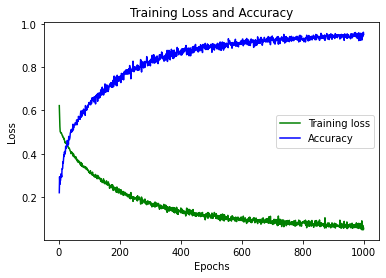

In [11]:
loss_train = history.history['loss']
loss_val = history.history['accuracy']
epochs = range(1,1001)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Accuracy')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()